<a href="https://colab.research.google.com/github/kylecata/kylecata/blob/main/ch_13_hw_13_19_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving chapter 13.19.3.csv to chapter 13.19.3.csv
User uploaded file "chapter 13.19.3.csv" with length 583 bytes


In [3]:
import pandas as pd
df = pd.read_csv('chapter 13.19.3.csv') 
df

,a,b,c,d,RESULTS
0,-1,-1,-1,-1,7.037
1,1,-1,-1,-1,14.707
2,-1,1,-1,-1,11.635
3,1,1,-1,-1,17.273
4,-1,-1,1,-1,10.403
5,1,-1,1,-1,4.368
6,-1,1,1,-1,9.360
7,1,1,1,-1,13.440
8,-1,-1,-1,1,8.561
9,1,-1,-1,1,16.867


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   a        32 non-null     int64  
 1   b        32 non-null     int64  
 2   c        32 non-null     int64  
 3   d        32 non-null     int64  
 4   RESULTS  32 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.4 KB


In [5]:
Xmain=df[['a', 'b', 'c', 'd']]
Xmain

,a,b,c,d
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [6]:
x1x2x3x4=df['a'] * df['b'] *df['c'] * df['d']
x1x2x3x4

0     1
1    -1
2    -1
3     1
4    -1
5     1
6     1
7    -1
8    -1
9     1
10    1
11   -1
12    1
13   -1
14   -1
15    1
16    1
17   -1
18   -1
19    1
20   -1
21    1
22    1
23   -1
24   -1
25    1
26    1
27   -1
28    1
29   -1
30   -1
31    1
dtype: int64

In [7]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'a', 'b', 'c', 'd','ab', 'ac', 'ad', 'bc', 'bd', 'cd', 'abc', 'abd', 'acd','bcd'])
xxpd['abcd']=x1x2x3x4
xxpd

,I,a,b,c,d,ab,ac,ad,bc,bd,cd,abc,abd,acd,bcd,abcd
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1


In [8]:
X=xxpd[['a', 'b', 'c', 'd','ab', 'ac', 'ad', 'bc', 'bd', 'cd', 'abc', 'abd', 'acd','bcd','abcd']]
Y=df[['RESULTS']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)

[[ 0.3305]
 [-0.256 ]
 [-0.227 ]
 [-0.271 ]
 [ 0.126 ]
 [ 0.135 ]
 [ 0.0535]
 [ 0.2585]
 [-0.195 ]
 [-0.0925]
 [ 0.109 ]
 [ 0.0925]
 [-0.2455]
 [ 0.1105]
 [ 0.1275]
 [ 0.3   ]
 [-0.3305]
 [ 0.256 ]
 [ 0.227 ]
 [ 0.271 ]
 [-0.126 ]
 [-0.135 ]
 [-0.0535]
 [-0.2585]
 [ 0.195 ]
 [ 0.0925]
 [-0.109 ]
 [-0.0925]
 [ 0.2455]
 [-0.1105]
 [-0.1275]
 [-0.3   ]]


In [9]:
X=xxpd[['I', 'a', 'b', 'c', 'd','ab', 'ac', 'ad', 'bc', 'bd', 'cd', 'abc', 'abd', 'acd','bcd','abcd']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     469.0
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           3.08e-18
Time:                        13:14:30   Log-Likelihood:                 5.8657
No. Observations:                  32   AIC:                             20.27
Df Residuals:                      16   BIC:                             43.72
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9881      0.050    238.042      0.0

13.19a
After analyzing the above information, we can see from the t-tests that (a) temperature, (b) titanium content, (c) heat treatment, (d) the amount of grain refiner used, (ab) two-way interation between temperature and titanium content, (ac) two-way interaction between temperature and heat treatment, and (abc) three-way interaction between temperature, titanium content, and heat treatment are signifigant factors becasue t<p(0.05).

In [10]:
model = ols('RESULTS ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(a):C(c) + C(a):C(d) + C(b):C(c) + C(b):C(d) + C(c):C(d) + C(a):C(b):C(c) + C(a):C(b):C(c):C(d)', data = df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),72.908850,1.0,898.338923,1.740225e-15
C(b),126.460656,1.0,1558.172011,2.247046e-17
C(c),103.464112,1.0,1274.822456,1.100354e-16
C(d),30.662280,1.0,377.802146,1.485334e-12
C(a):C(b),29.926716,1.0,368.738965,1.790240e-12
C(a):C(c),128.496480,1.0,1583.256213,1.979949e-17
C(a):C(d),0.046818,1.0,0.576863,4.585895e-01
C(b):C(c),0.073728,1.0,0.908432,3.547091e-01
C(b):C(d),0.017861,1.0,0.220066,6.453180e-01
C(c):C(d),0.047278,1.0,0.582533,4.564284e-01


13.19b
Factors a,b,c,d,ab,ac, and abc all have p values < 0.05, which shows unequal variance between the different factors. In the context of the problem, this means that cracking is most likely to be affeted by these factors.

In [11]:
X=xxpd[['a','b','c','d','ab','ac','abc']]
Y=df[['RESULTS']]
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=xxpd[['I','a','b','c','d','ab','ac','abc']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                RESULTS   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1242.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           3.97e-29
Time:                        13:14:31   Log-Likelihood:                 2.7701
No. Observations:                  32   AIC:                             10.46
Df Residuals:                      24   BIC:                             22.19
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9881      0.045    264.659      0.0

13.19c above.

In [12]:
res.resid

0     0.3305
1    -0.2560
2    -0.2270
3    -0.2710
4     0.1260
5     0.1350
6     0.0535
7     0.2585
8    -0.1950
9    -0.0925
10    0.1090
11    0.0925
12   -0.2455
13    0.1105
14    0.1275
15    0.3000
16   -0.3305
17    0.2560
18    0.2270
19    0.2710
20   -0.1260
21   -0.1350
22   -0.0535
23   -0.2585
24    0.1950
25    0.0925
26   -0.1090
27   -0.0925
28    0.2455
29   -0.1105
30   -0.1275
31   -0.3000
dtype: float64

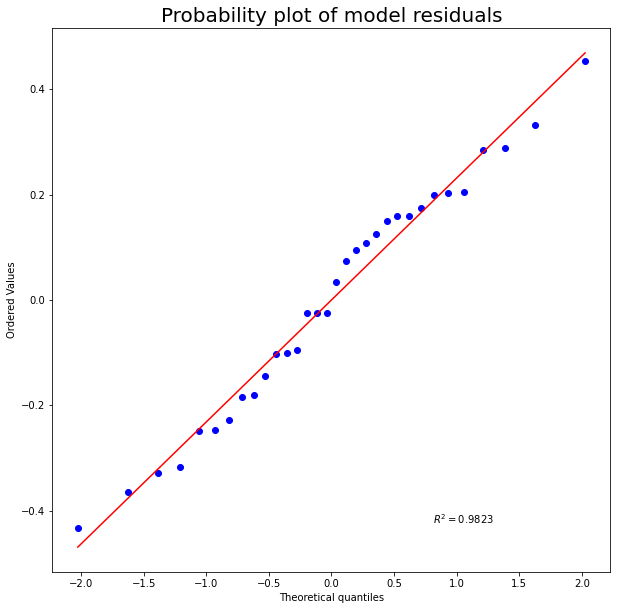

In [13]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residuals", fontsize= 20)
ax.set

plt.show()

13.19d
After looking at the residual plot, we see that it fails the fat pencil test. The plot is shown like this because there is a lot of variability between the factors and levels that were determined to be signifigant.

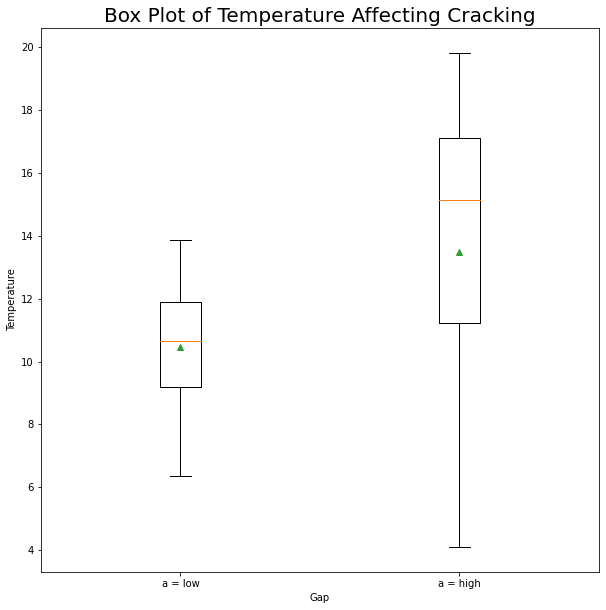

In [14]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Temperature Affecting Cracking", fontsize= 20)
ax.set

boxdata= [df['RESULTS'][df['a'] == -1],
             df['RESULTS'][df['a'] == 1]]


ax.boxplot(boxdata,
           labels= ['a = low', 'a = high'],
           showmeans= True)

plt.xlabel("Gap")
plt.ylabel("Temperature")

plt.show()

13.19e
The boxplot shows that as the temperature increases, so does the length and variabilty of the crack.

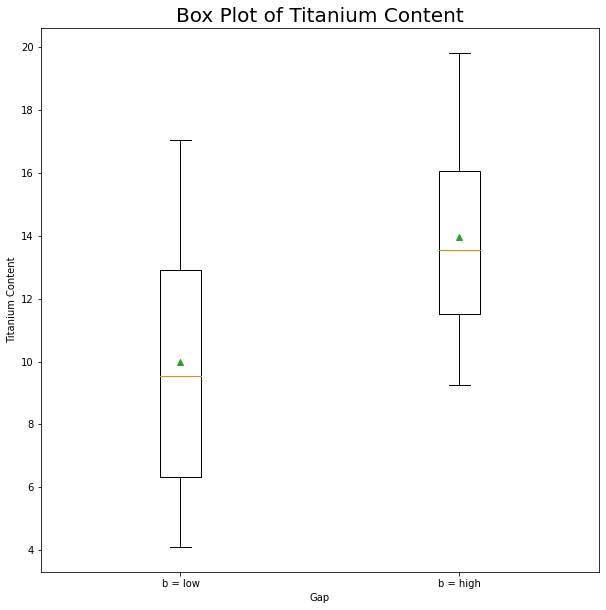

In [15]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Titanium Content", fontsize= 20)
ax.set

boxdata= [df['RESULTS'][df['b'] == -1],
             df['RESULTS'][df['b'] == 1]]


ax.boxplot(boxdata,
           labels= ['b = low', 'b = high'],
           showmeans= True)

plt.xlabel("Gap")
plt.ylabel("Titanium Content")

plt.show()

 The boxplot shows that as the titanium content increases, so does the length and variabilty of the crack.

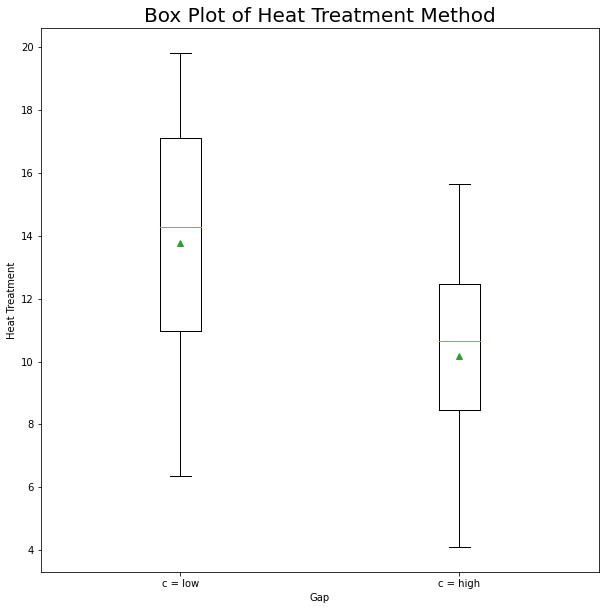

In [16]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Heat Treatment Method", fontsize= 20)
ax.set

boxdata= [df['RESULTS'][df['c'] == -1],
             df['RESULTS'][df['c'] == 1]]


ax.boxplot(boxdata,
           labels= ['c = low', 'c = high'],
           showmeans= True)

plt.xlabel("Gap")
plt.ylabel("Heat Treatment")

plt.show()

 The boxplot shows that as heat treatment method increases, so does the length and variabilty of the crack.

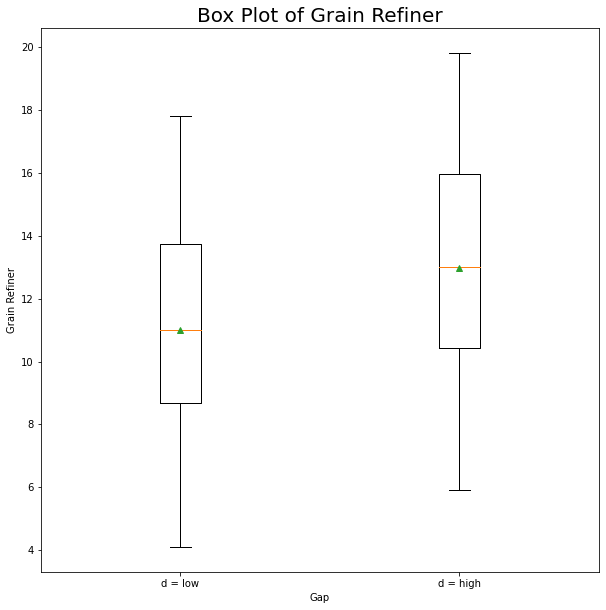

In [17]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Grain Refiner", fontsize= 20)
ax.set

boxdata= [df['RESULTS'][df['d'] == -1],
             df['RESULTS'][df['d'] == 1]]


ax.boxplot(boxdata,
           labels= ['d = low', 'd = high'],
           showmeans= True)

plt.xlabel("Gap")
plt.ylabel("Grain Refiner")

plt.show()

 The boxplot shows that as grain refiner increases, so does the length and variabilty of the crack.

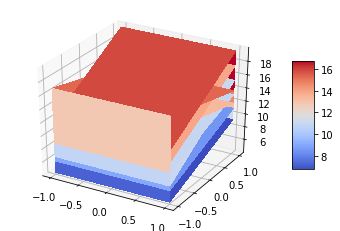

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['a']
x2=df['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

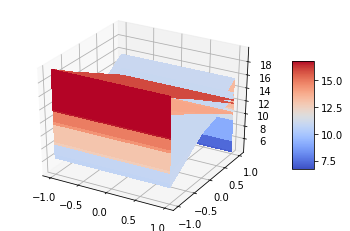

In [19]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['a']
x2=df['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

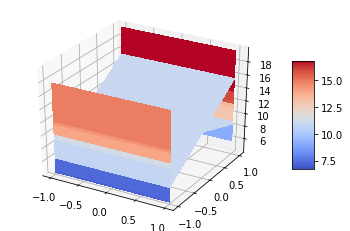

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['a']
x2=df['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

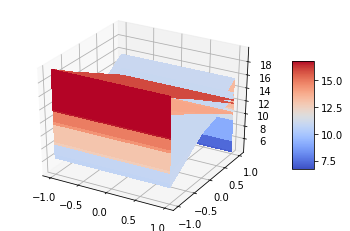

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['b']
x2=df['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

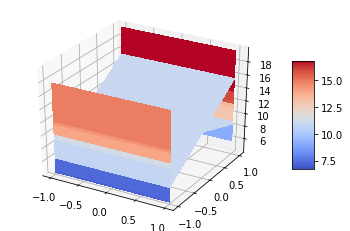

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['b']
x2=df['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

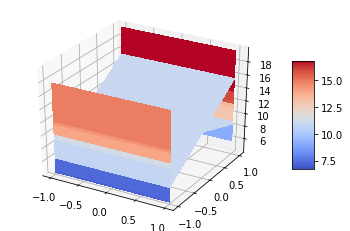

In [23]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['c']
x2=df['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

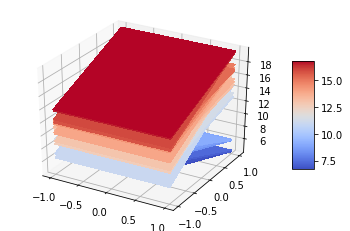

In [24]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['a']
x2=df['a']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

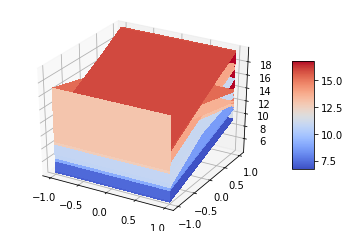

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['b']
x2=df['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

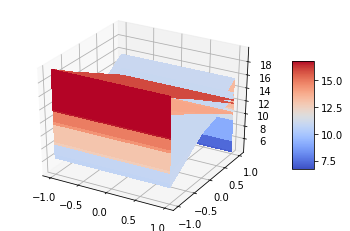

In [26]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['c']
x2=df['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

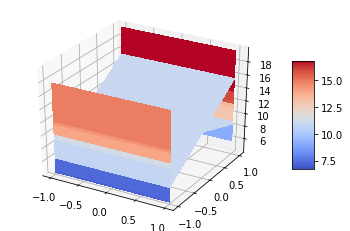

In [27]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['d']
x2=df['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

The 3-D surface plots show the main factors are a, b, and c. The higher those factors are, the more variablity in length of crack. To decrease crack length, decrease factors a, b, and c.

13.20

In [28]:
CPlus = xxpd[['I', 'a', 'b', 'c','ab', 'ac', 'bc', 'abc','d','ad','bd','abd','cd','acd','bcd','abcd']][xxpd['c'] == 1]
CPlus['RESULTS'] = df['RESULTS'][df['c'] == 1]
CPlus.tail()

,I,a,b,c,ab,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd,RESULTS
23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,12.923
28,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1,12.337
29,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1,5.904
30,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1,10.935
31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,15.053


In [29]:
CMinus = xxpd[['I', 'a', 'b', 'c','ab', 'ac', 'bc', 'abc','d','ad','bd','abd','cd','acd','bcd','abcd']][xxpd['c'] == -1]
CMinus['RESULTS'] = df['RESULTS'][df['c'] == -1]
CMinus.tail()

,I,a,b,c,ab,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd,RESULTS
19,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1,17.815
24,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1,8.951
25,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1,17.052
26,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1,13.658
27,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1,19.639


In [30]:
X3=CPlus[['a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
Y3=CPlus[['RESULTS']]
regr=LinearRegression()
regr.fit(X3,Y3)
Yhat3=regr.predict(X3)
Yhat3

array([[10.3330625],
       [ 4.1769375],
       [ 9.2504375],
       [13.2375625],
       [12.0354375],
       [ 6.0705625],
       [11.1185625],
       [15.2969375],
       [10.3330625],
       [ 4.1769375],
       [ 9.2504375],
       [13.2375625],
       [12.0354375],
       [ 6.0705625],
       [11.1185625],
       [15.2969375]])

In [31]:
X4=CMinus[['a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
Y4=CMinus[['RESULTS']]
regr=LinearRegression()
regr.fit(X4,Y4)
Yhat4=regr.predict(X4)
Yhat4

array([[ 6.7484375],
       [14.9210625],
       [11.8200625],
       [17.5859375],
       [ 8.7140625],
       [17.0014375],
       [13.8089375],
       [19.6895625],
       [ 6.7484375],
       [14.9210625],
       [11.8200625],
       [17.5859375],
       [ 8.7140625],
       [17.0014375],
       [13.8089375],
       [19.6895625]])

In [32]:
model3 = sm.OLS(Y3, X3)
res3=model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                RESULTS   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     456.7
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           1.17e-10
Time:                        13:14:40   Log-Likelihood:                 3.3624
No. Observations:                  16   AIC:                             7.275
Df Residuals:                       9   BIC:                             12.68
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a             -0.2472      0.033     -7.564      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [33]:
model4 = sm.OLS(Y4, X4)
res4=model4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                RESULTS   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     551.6
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           5.01e-11
Time:                        13:14:40   Log-Likelihood:                 1.6558
No. Observations:                  16   AIC:                             10.69
Df Residuals:                       9   BIC:                             16.10
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a              1.7567      0.036     48.308      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


13.20a
The biggest difference between the models is heat treatment(c) has the largest positive coefficient in model 3(+C) and the smallest negative coefficient in model 4(-C). This means that the factor heat treatment has the most effect on crack length.

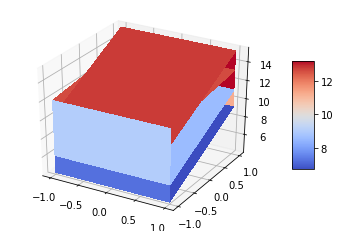

In [34]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=CPlus['a']
x2=CPlus['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

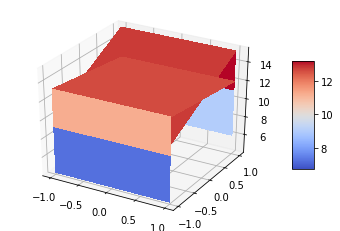

In [35]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=CPlus['a']
x2=CPlus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

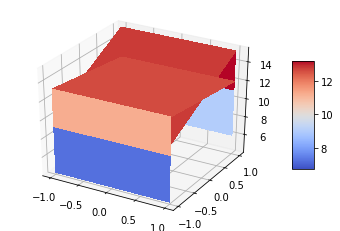

In [36]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=CPlus['b']
x2=CPlus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

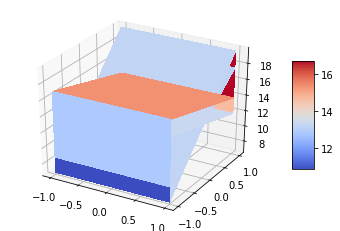

In [37]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=CMinus['a']
x2=CMinus['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

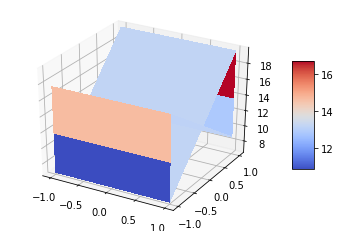

In [38]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=CMinus['a']
x2=CMinus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

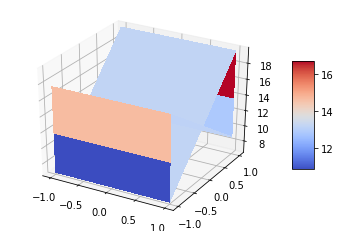

In [39]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=CMinus['b']
x2=CMinus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

13.20c
Setting heat treatment to C+, I would use low levels of the factors temperature, titanium content, and the amount of grain refiner used to decrease the amount of vaiabilty as well as the crack length.

13.20d
Setting heat treatment to C-, I would use low levels of temperature and titanium content and a high level of of grain refiner used to decrease the amount of variability as well as crack length.